## Exercises7

## TASK7-1
1. **(2 points)** 1. Think of a multiobjective optimization problem from your own life with at least three objectives. Model this problem using algebraic equations (decision variables, objective functions, constraints).

### Solution7-1

#### Introduction
In our every day life, we often encounter this situation where we are in a dilemma of choosing which flight ticket is the best option? Sometimes, the cheapest ticket will depature at a very awful time in a day, such as 1am or 4am. An other case is the cheap and best depature flight contains many stops which extending the travel time.

Therefore, we come up with a problem: 

Find the cheapest flight ticket which has the best depature time(asumme the best time is 9am - 9pm) and the minimun flight travel time.

#### Assumption and Analysis

We assume that the best depature time is from 9:00 to 21:00,because at this time interval most of the public severice is still open.

Also it is reasonable and simplified that the flight time follows some kind of quadratic equation. This means that with the flight stop(flight time) increase the flight price decrease at some point then increase.


Futhermore, we make a assumption of 1 stop increse 1hours flight time, and the best flight time no greater than 4 hours. one flight last 2 hours.



In [1]:
import numpy as np
M = 2.5 #control the weight of departure function
B = 50 #control the height of departure function
B2 = 100 #control the height of flight time function
n = 5# polynomial number
n2 = 2 #

### Depature time function.

In [2]:
x1 = np.arange(0,7,1)
x2 = np.arange(7,25,1)
def t1(x):
    return M*(x*(x-6))+ B
def t2(x):
    return M*((x-6)*(24-x))+ B
arr1 = t1(x1)
arr2 = t2(x2)
X = np.concatenate((x1, x2))
Y = np.concatenate((arr1, arr2))
P = np.polyfit(X, Y, n)
print(X)
print(P)
def poly(x,p):
    return sum([ p[i]*(x**(n-i)) for i in range(n+1)] )
    #return M*(p[3] + (x**(n-1))*p[1] +(x**(n-1))*p[1]+ (x**n)*p[0])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[-1.82601007e-06  8.35150607e-03 -5.24859205e-01  9.34955468e+00
 -3.71453794e+01  5.97973475e+01]


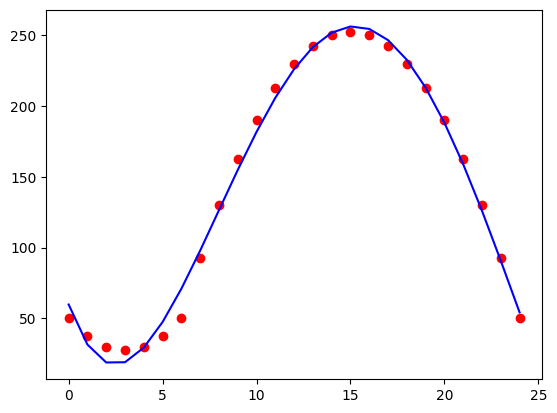

19.012031222151222


In [3]:
import matplotlib.pyplot as plt
plt.scatter(X,Y, color = 'red')
plt.plot(X, poly(X,P), color = 'blue')
plt.show()
print ( poly(3,P))

$$
D(x) \approx -\frac{1.826}{10^6}x^5 + \frac{8.3515}{10^3}x^4 -\frac{5.2485}{10}x^3 + 9.3495x^2 -37.145x +5.9797
$$

### flight time 

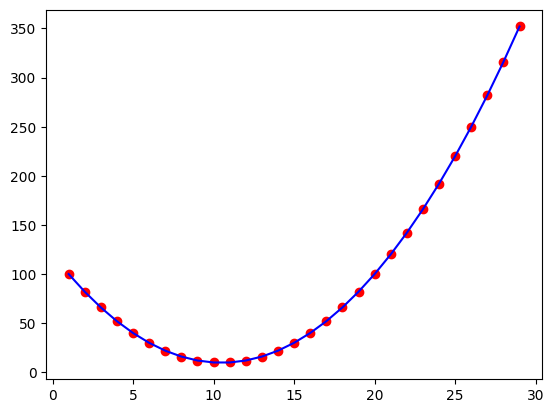

10


In [4]:
x2 = np.arange(1,30,1)
def quadra(x):
    return (x-1)*(x-20)+B2
y2 = quadra(x2)

import matplotlib.pyplot as plt
plt.scatter(x2, y2, color= 'red')
plt.plot(x2, quadra(x2), color = 'blue')
plt.show()
print(quadra(10))

$$
f(t) = (t-1)*(t-20)+100
$$

#### Flight Price

$$
\begin{align}
p(x,t) &= d(x) + f(t)\\
&= (-\frac{1.826}{10^6}x^5 + \frac{8.3515}{10^3}x^4 -\frac{5.2485}{10}x^3 + 9.3495x^2 -37.145x +5.9797)
 + (t-1)*(t-20)+100
\end{align}
$$

### Mathmatical Model

$$
\begin{align}
\min.\quad &p(x,t),\quad |x-15| \geq 0,\quad |t-15| \geq 0 \\
s.t.\quad &10\leq p(x,t) \leq 250\\
&0< x \leq 24 \\
&0< t \leq 30 \\
where\quad &p(x,t) = (-\frac{1.826}{10^6}x^5 + \frac{8.3515}{10^3}x^4 -\frac{5.2485}{10}x^3 + 9.3495x^2 -37.145x +5.9797)
 + (t-1)*(t-20)+100
\end{align}
$$


## TASK7-2

2. **(10 points)** Use DESDEO framework to create a problem object for your problem. Then, find the ideal and nadir vectors by using available tools in DESDEO. Finally, import NIMBUS method and solve your problem and find preferable solutions (with at least three iterations). Describe how you inputted your problem and what kind of preference information (i.e., classification of objectives) you used when computing improved solutions starting from the initial solution. Analyse the results (i.e., write what you think about the solutions found). 

**Hint.** See examples in the DESDEO paper https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9591595

### Solution7-2

In [5]:
import math
def flight_problem(x,t):
    return [abs(x-15), 
            abs(t-15),
            sum([ P[i]*(x**(n-i)) for i in range(n+1)]) + (t-1)*(t-20)+100]


In [6]:
print("Flight price in 3:00, 10 hours flight time length "
      +str(flight_problem(3,10)[2])+"€")
print("Flight price in 15:00, 10 hours flight time length "
      +str(flight_problem(15,15)[2])+"€")
print("Flight price in 6:00, 5 hours flight time length "
      +str(flight_problem(6,5)[2])+"€")

Flight price in 3:00, 10 hours flight time length 29.012031222151222€
Flight price in 15:00, 10 hours flight time length 286.27501127058827€
Flight price in 6:00, 5 hours flight time length 110.94880426919374€


## Calculating the ideal and nadir

In [11]:
#Calculating the ideal
from scipy.optimize import minimize
import ad
def calc_ideal(f):
    ideal = [0]*3 #Because there are three objectives
    solutions = [] #list for storing the actual solutions, which give the ideal
    bounds = ((3,10),(50,200),(1000,4000)) #Bounds of the problem
    starting_point = [3,50,1000]
    for i in range(3):
        res=minimize(
            #Minimize each objective at the time
            lambda x: f(x[0],x[1])[i], starting_point, method='SLSQP'
            #Jacobian using automatic differentiation (note: SLSQP can estimate gradiants itself with some extra function evaluations)
            #,jac=ad.gh(lambda x: f(x[0],x[1],x[2])[i])[0]
            #bounds given above
            ,bounds = bounds
            ,options = {'disp':True, 'ftol': 1e-20, 'maxiter': 1000})
        solutions.append(f(res.x[0],res.x[1]))
        ideal[i]=res.fun
    return ideal,solutions

ideal, solutions= calc_ideal(flight_problem)
print ("ideal is "+str(ideal))
for solution in solutions:
    print(solution) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 5.0
            Iterations: 6
            Function evaluations: 20
            Gradient evaluations: 5
Optimization terminated successfully    (Exit mode 0)
            Current function value: 35.0
            Iterations: 1
            Function evaluations: 4
            Gradient evaluations: 1
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1589.012031222151
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
ideal is [5.0, 35.0, 1589.012031222151]
[5.0, 35.0, 1751.7722764491878]
[12.0, 35.0, 1589.012031222151]
[12.0, 35.0, 1589.012031222151]


### Using DESDEO

In [7]:
from desdeo_problem.problem import MOProblem
from desdeo_problem.problem import Variable
from desdeo_problem.problem import ScalarObjective

def f_1(x:np.ndarray)->np.ndarray:
    x = np.atleast_2d(x)
    return abs(x[:,0]-15)

def f_2(x:np.ndarray)->np.ndarray:
    x = np.atleast_2d(x)
    return abs(x[:,1]-15)

def f_3(x:np.ndarray)->np.ndarray:
    x = np.atleast_2d(x)
    return flight_problem(x[:,0],x[:,1])[2]

objective_1 = ScalarObjective(name="f_1", evaluator=f_1)
objective_2 = ScalarObjective(name="f_2", evaluator=f_2)
objective_3 = ScalarObjective(name="f_3", evaluator=f_3)

objectives = [objective_1, objective_2, objective_3]
x_1 = Variable("x_1", 0, 0, 24)
x_2 = Variable("x_2", 1, 1, 30 )
x_3 = Variable("x_3", 0, 0, 300 )
variables = [x_1,x_2,x_3]
mo_problem = MOProblem(variables=variables, objectives=objectives)
#mo_problem = MOProblem(Variables=variables, objectives=objectives)

from desdeo_mcdm.utilities import payoff_table_method

ideal, nadir = payoff_table_method(mo_problem)

mo_problem.ideal = ideal
mo_problem.nadir = nadir

print(f"Ideal point: {mo_problem.ideal}")
print(f"Nadir point: {mo_problem.nadir}")
print(f"Ideal strictly better than nadir?: {np.all(mo_problem.ideal <= mo_problem.nadir)}")

Ideal point: [ 0.          0.         27.24025557]
Nadir point: [ 12.52463257   6.36030481 383.97123174]
Ideal strictly better than nadir?: True


### NIMBUS

In [8]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from desdeo_mcdm.interactive.NIMBUS import NIMBUS

method = NIMBUS(mo_problem, "scipy_de")

classification_request, plot_request = method.start()
print(classification_request.content.keys())
print(classification_request.content["message"])

dict_keys(['message', 'objective_values', 'classifications', 'levels', 'number_of_solutions'])
Please classify each of the objective values in one of the following categories:
	1. values should improve '<'
	2. values should improve until some desired aspiration level is reached '<='
	3. values with an acceptable level '='
	4. values which may be impaired until some upper bound is reached '>='
	5. values which are free to change '0'
Provide the aspiration levels and upper bounds as a vector. For categories 1, 3, and 5,the value in the vector at the objective's position is ignored. Supply also the number of maximumsolutions to be generated.


In [9]:
print(classification_request.content["objective_values"])
print(classification_request.content["classifications"])

[  5.45483046   2.75454412 182.60665105]
[None]


In [58]:
response = {
    "classifications": [">=", ">=","0"],
    "number_of_solutions": 2,
    "levels": [8, 2,300]
}
classification_request.response = response
print(classification_request.response)

{'classifications': ['>=', '>=', '0'], 'number_of_solutions': 2, 'levels': [8, 2, 300]}


In [62]:
save_request,_ = method.iterate(classification_request)

RuntimeError: The map-like callable must be of the form f(func, iterable), returning a sequence of numbers the same length as 'iterable'

In [55]:
print(save_request.content.keys())
print(save_request.content["message"])
print(save_request.content["objectives"])

NameError: name 'save_request' is not defined